In [57]:
# Starting point
import warnings
warnings.filterwarnings('ignore')

from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

## Prova per capire le smart slides

### N.B. E' consigliata la visualizzazione da desktop -laptop. Per un utilizzo ottimale da cellulare è consigliato matenrelo in orientamento orizzontale

In [58]:
# Starting point
import warnings
warnings.filterwarnings('ignore')

from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [59]:
import pandas as pd
lista = [22,12,13,23,1,2,3]

## Grafico dell' andamento di sto cazzo

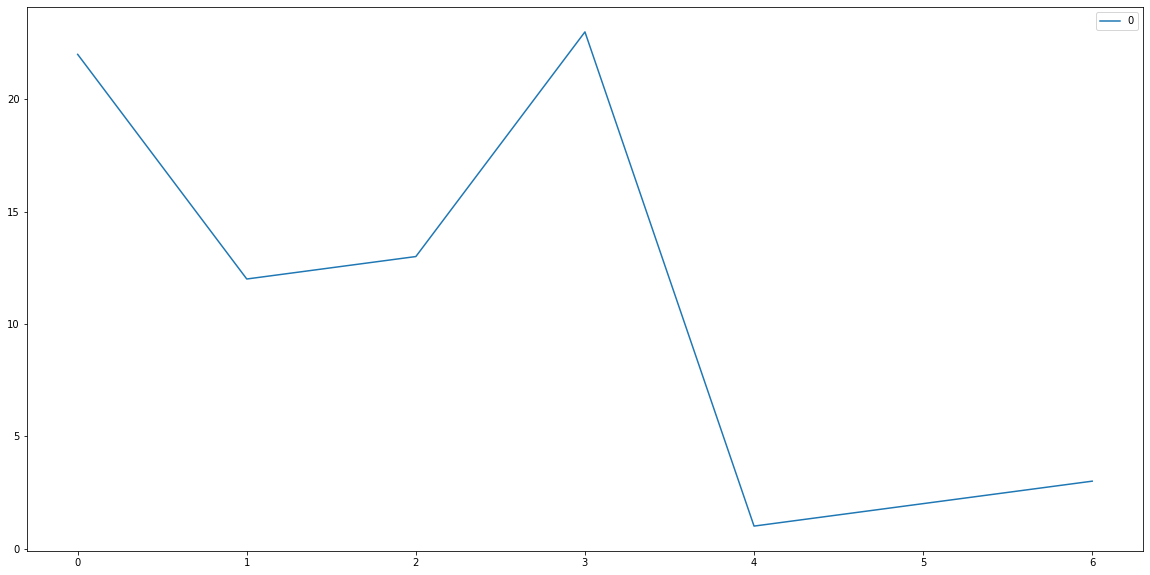

In [60]:
pd.DataFrame(lista).plot(figsize = (20,10))

Capiamo come una slide di testo può essere associata ad una di grafico. Nel grafico è illustrato l'andamento di sto cazzo mentre cercavo di settare html nel modo corretto

## Grafico dell' andamento di sto cazzo - Bis

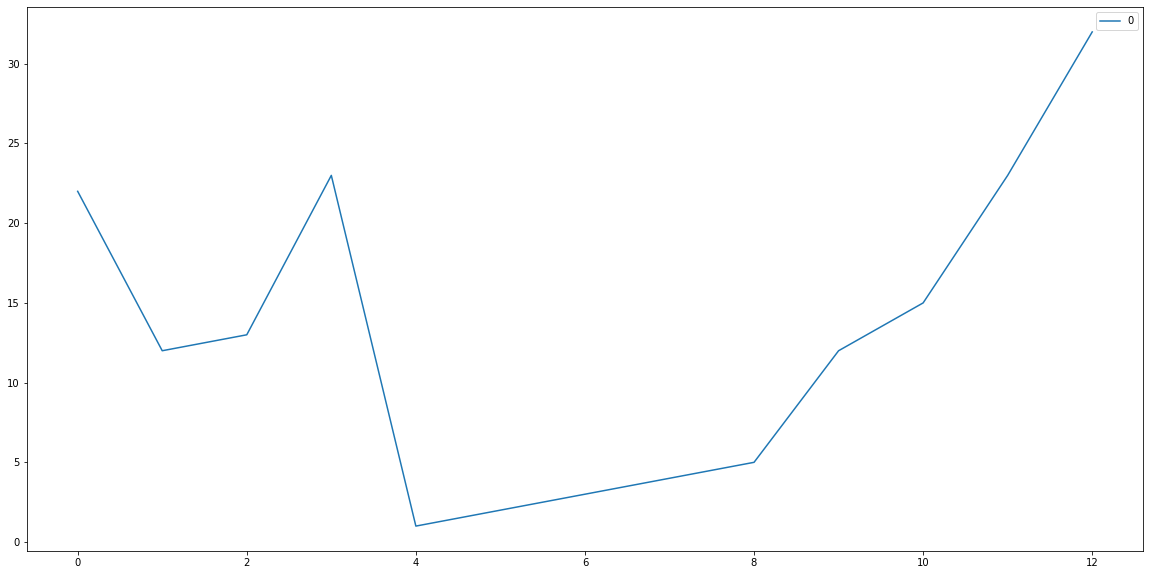

In [61]:
import pandas as pd
lista = [22,12,13,23,1,2,3,4,5,12,15,23,32]
pd.DataFrame(lista).plot(figsize = (20,10))

In questo grafico, che dovrebbe apparire in una slde successiva, illustriamo l'andamento di sto cazzo dopo la scoperta di questa funzionalità di jupyter notebook.

## Qua invece mostriamo come sia possibile includere un video nella slide

In [62]:
# HTML('<iframe width="560" height="315" src="iframe width="560" height="315" src="https://www.youtube.com/embed/Rfx2rVcK9Kw" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')
HTML('<iframe width="1000" height="400" src="https://www.youtube.com/embed/Rfx2rVcK9Kw?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')
# <iframe width="560" height="315" src="https://www.youtube.com/embed/Rfx2rVcK9Kw" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Il video dovrebbe essere riproducibile cliccandoci sopra, e mostra il buon Ruggero Bertelli, professore all' università di Padova

#### Un grafico può essere associato ad una tabella, e il grafico reso interattivo

In [64]:
from zeep import Client
import pandas as pd
import pandas_datareader as pdr
import datetime 
import numpy as np
import altair as alt
alt.renderers.enable('html')

ISIN = ['LU0115769746', 'IT0000380045']

client = Client('http://ws.bbfinance.net/_bnb_ws/bnb_ws.wsdl') #4G58NHO2VNH3RJD9
LOGIN = client.service.Login("fabrizio.monge@gmail.com", "PMuxLBzkFvRib21")
TOK = LOGIN.LOGIN_RESPONSE.token
A = client.service.GetHistoryFromDate(TOK,"SP", "LU0115769746","2005-1-1","")
length = len(A.QUOTES2)

lista1=[]
lista2=[]

for i in range (length):
  data = A.QUOTES2[i].d
  # prezzo = A.QUOTES2[i].c
  lista1.append(data)
  # lista2.append(prezzo)

df = pd.DataFrame(index = lista1)
df.index = pd.to_datetime(df.index)
df = df.resample('M').last()

for isin in ISIN:

    A = client.service.GetHistoryFromDate(TOK,"SP", isin,"2005-1-1","")
    length = len(A.QUOTES2)

    lista1=[]
    lista2=[]

    for i in range (length):
      data = A.QUOTES2[i].d
      prezzo = A.QUOTES2[i].c
      lista1.append(data)
      lista2.append(prezzo)

    df_add = pd.DataFrame(lista2, index = lista1, columns=[isin])
    df_add.index = pd.to_datetime(df_add.index)
    df_add = df_add.resample('M').last()
    df = df.join(df_add)

data = df.dropna()
    
data=data.resample('M').last()



data=data.dropna()

data['portafoglio 80-20']=(data['IT0000380045']*0.2+data['LU0115769746']*0.8)
data['portafoglio 70 30']=(data['IT0000380045']*0.3+data['LU0115769746']*0.7)
data['portafoglio 60 40']=(data['IT0000380045']*0.4+data['LU0115769746']*0.6)
data['portafoglio 50 50']=(data['IT0000380045']*0.5+data['LU0115769746']*0.5)
data['portafoglio 40 60']=(data['IT0000380045']*0.6+data['LU0115769746']*0.4)
data['portafoglio 30 70']=(data['IT0000380045']*0.7+data['LU0115769746']*0.3)
data['portafoglio 20 80']=(data['IT0000380045']*0.8+data['LU0115769746']*0.2)
    
data_log = np.log(data/data.shift(1))

report = pd.DataFrame(np.exp(data_log.mean()*12)-1, columns=['Rendimento Medio'])

report2 =pd.DataFrame(data_log.std()*(12**(1/2)), columns=['Dev Annualizzata'])
report = report.join(report2)
display(report)

report = report.reset_index(drop=False)

fig1 = alt.Chart(report).mark_circle(size=700).encode(x='Dev Annualizzata', y='Rendimento Medio',tooltip=['index','Rendimento Medio', 'Dev Annualizzata']).properties(height=200, width=600).interactive()
fig1

,Rendimento Medio,Dev Annualizzata
LU0115769746,0.071480,0.149846
IT0000380045,0.028187,0.033235
portafoglio 80-20,0.057953,0.099240
portafoglio 70 30,0.052569,0.081509
portafoglio 60 40,0.047849,0.067061
portafoglio 50 50,0.043668,0.055320
portafoglio 40 60,0.039931,0.046034
portafoglio 30 70,0.036566,0.039168
portafoglio 20 80,0.033515,0.034801


alt.Chart(...)

Utilizzando il  mouse dovrebbe essere possibile avvicinare e allontanare il grafico e spostarlo nelle 4 direzioni